Enter Strike Price (K): 2000
Enter Premium (P): 30
Enter Range Width around K (default 50): 50


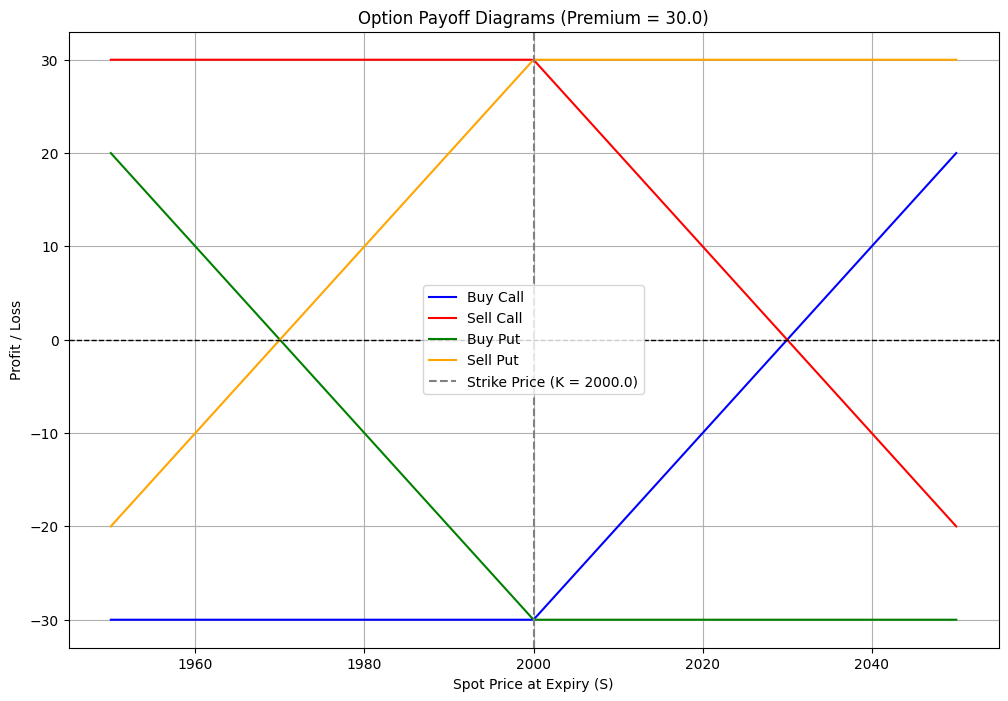


Observations:
- Buy Call: Limited loss (premium paid), unlimited profit if spot > K+P.
- Sell Call: Limited profit (premium received), unlimited loss if spot > K+P.
- Buy Put: Limited loss (premium paid), profit if spot < K-P.
- Sell Put: Limited profit (premium received), loss if spot < K-P.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Payoff Functions ---

def buy_call(S, K, P):
    # Profit for buying a Call option.

    return np.maximum(0, S - K) - P

def sell_call(S, K, P):
    # Profit for selling a Call option.

    return P - np.maximum(0, S - K)

def buy_put(S, K, P):

    # Profit for buying a Put option.

    return np.maximum(0, K - S) - P

def sell_put(S, K, P):
    # Profit for selling a Put option.

    return P - np.maximum(0, K - S)

# --- Plotting Function ---

def plot_option_payoffs(K, P, range_width=50):
    """
    Plots Profit/Loss vs Spot Price for:
    Buy Call, Sell Call, Buy Put, Sell Put options.

    Args:
        K: Strike Price
        P: Premium
        range_width: Range around K to plot (default ±50)
    """
    # Creating array of spot prices from (K - range_width) to (K + range_width)
    S = np.linspace(K - range_width, K + range_width, 300)

    # Calculating payoffs for each strategy
    payoff_buy_call = buy_call(S, K, P)
    payoff_sell_call = sell_call(S, K, P)
    payoff_buy_put = buy_put(S, K, P)
    payoff_sell_put = sell_put(S, K, P)

    plt.figure(figsize=(12, 8))

    # Ploting all payoffs with different colors and labels
    plt.plot(S, payoff_buy_call, label='Buy Call', color='blue')
    plt.plot(S, payoff_sell_call, label='Sell Call', color='red')
    plt.plot(S, payoff_buy_put, label='Buy Put', color='green')
    plt.plot(S, payoff_sell_put, label='Sell Put', color='orange')

    # Adding horizontal line at zero profit
    plt.axhline(0, color='black', linestyle='--', linewidth=1)

    # Adding vertical line at strike price
    plt.axvline(K, color='grey', linestyle='--', label=f'Strike Price (K = {K})')

    # Graph labels and title
    plt.title(f'Option Payoff Diagrams (Premium = {P})')
    plt.xlabel('Spot Price at Expiry (S)')
    plt.ylabel('Profit / Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Main Code ---

if __name__ == "__main__":
    # Takeing inputs from user
    K = float(input("Enter Strike Price (K): "))
    P = float(input("Enter Premium (P): "))
    range_input = input("Enter Range Width around K (default 50): ").strip()
    range_width = float(range_input) if range_input else 50.0

    # Ploting +the payoffs
    plot_option_payoffs(K, P, range_width)

    # Observations as comments (can convert to markdown in notebooks)
    print("\nObservations:")
    print("- Buy Call: Limited loss (premium paid), unlimited profit if spot > K+P.")
    print("- Sell Call: Limited profit (premium received), unlimited loss if spot > K+P.")
    print("- Buy Put: Limited loss (premium paid), profit if spot < K-P.")
    print("- Sell Put: Limited profit (premium received), loss if spot < K-P.")
